In [2]:
from fastai.vision import *

In [4]:
folder = 'Mango-Seed-Weevil'
file = '/home/arjun/Documents/git/Mango-Pest-Detector/urls/urls_Mango_Seed_Weevil.csv'

In [5]:
path = Path('/home/arjun/Documents/git/Mango-Pest-Detector/data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
path.ls()

[PosixPath('/home/arjun/Documents/git/Mango-Pest-Detector/data/Anthracnose-on-Fruit'),
 PosixPath('/home/arjun/Documents/git/Mango-Pest-Detector/data/Mango-Pulp-Weevil'),
 PosixPath('/home/arjun/Documents/git/Mango-Pest-Detector/data/Mango-Seed-Weevil'),
 PosixPath('/home/arjun/Documents/git/Mango-Pest-Detector/data/Mango-Malformation'),
 PosixPath('/home/arjun/Documents/git/Mango-Pest-Detector/data/Mango-Black-Blight'),
 PosixPath('/home/arjun/Documents/git/Mango-Pest-Detector/data/Red-Rust'),
 PosixPath('/home/arjun/Documents/git/Mango-Pest-Detector/data/Asian-Mango-Long-Horned-Beetle')]

In [7]:
classes = ['Anthracnose-on-Fruit','Asian-Mango-Long-Horned-Beetle','Mango-Black-Blight','Mango-Malformation','Mango-Seed-Weevil','Mango-Pulp-Weevil','Red-Rust']

In [42]:
download_images(path/file, dest, max_pics=500)

In [17]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [8]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['Anthracnose-on-Fruit',
 'Asian-Mango-Long-Horned-Beetle',
 'Mango-Black-Blight',
 'Mango-Malformation',
 'Mango-Pulp-Weevil',
 'Mango-Seed-Weevil',
 'Red-Rust']

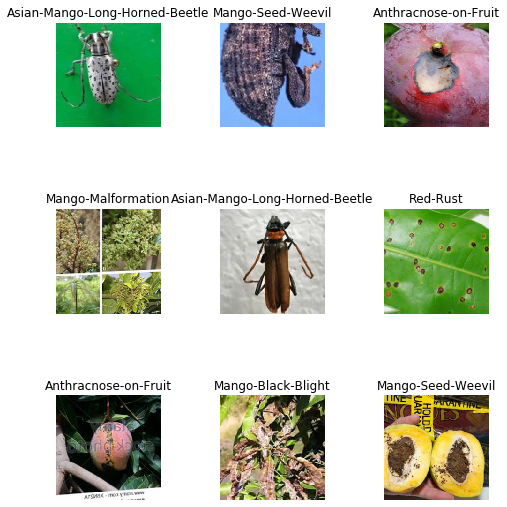

In [10]:
data.show_batch(rows=3, figsize=(7,8))

In [11]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Anthracnose-on-Fruit',
  'Asian-Mango-Long-Horned-Beetle',
  'Mango-Black-Blight',
  'Mango-Malformation',
  'Mango-Pulp-Weevil',
  'Mango-Seed-Weevil',
  'Red-Rust'],
 7,
 301,
 75)

In [12]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/arjun/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [02:31<00:00, 576kB/s] 


In [13]:
learn.fit_one_cycle(4)

KeyboardInterrupt: 